# Baseline Model for Anomaly Detection

In this notebook, we develop the PCA baseline model and evaluate the metrics of anomaly detection.

In [1]:
import warnings
import pandas as pd
from modules.anomaly_detector import AnomalyDetectionKit

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# create class of anomaly detection kit
adk = AnomalyDetectionKit()

In [4]:
# load data and drop the probability column
data = pd.read_csv('../0_data/som_studies/data_normal.csv')
data.head()

,q_feed_L_min,q_out_L_min,temp_feed_C,conc_feed_mol_L,level,conc_out_mol_L,temp_out_C
0,5.019711,5.044872,76.787013,0.200325,0.133468,0.201289,76.239923
1,4.987904,5.050311,77.311464,0.200990,0.129478,0.203357,79.187765
2,5.116799,4.985351,77.237632,0.199987,0.133575,0.202515,78.021057
3,4.918172,5.064972,76.393341,0.197022,0.134329,0.196865,76.813857
4,4.936505,5.048526,77.524691,0.201873,0.133522,0.201269,78.834522


Parallel Method Results
--------------------------------------------------
Number of PCs retained: 7
Explained Variance: 100.0 %


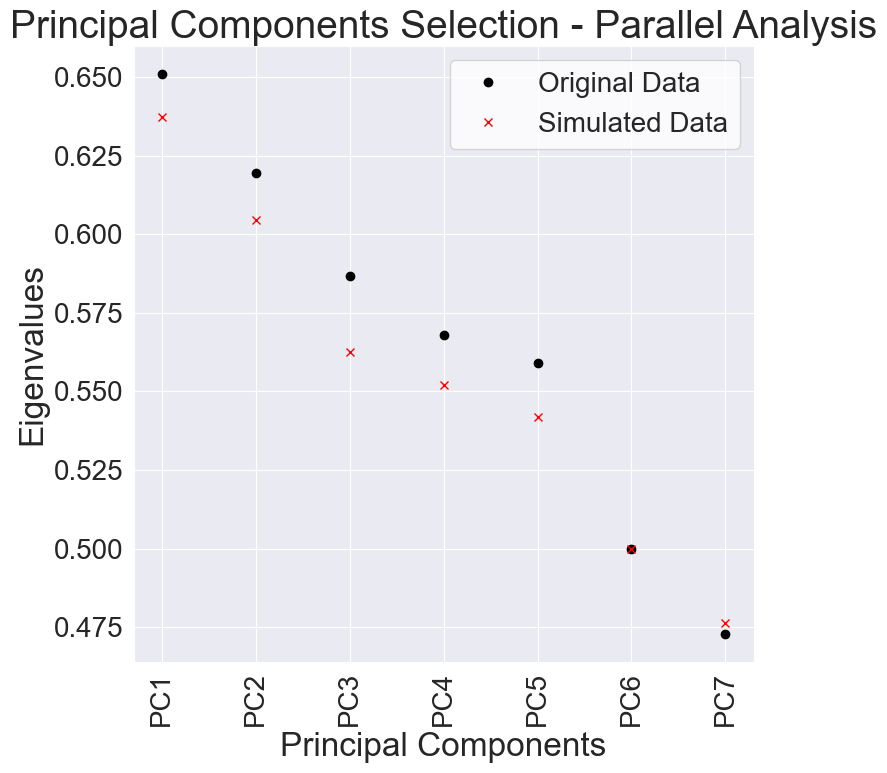

In [5]:
# apply the parallel method
adk.parallel_analysis(data, plot=True)

- The parallel analysis method selected 11 principal components. However, the scree plot suggests that only three components are sufficient for the elbow.

In [10]:
# fit the final PCA
adk.fit_final(data, n=6)
# adk.save_model(adk.final_pca, 'baseline')

Number of PCs changed
--------------------------------------------------
Number of PCs retained: 6
Explained Variance: 88.05 %


In [11]:
# calculate Hotellings T2s and critical value
t2s, tmax = adk.calculate_T2(data=data)

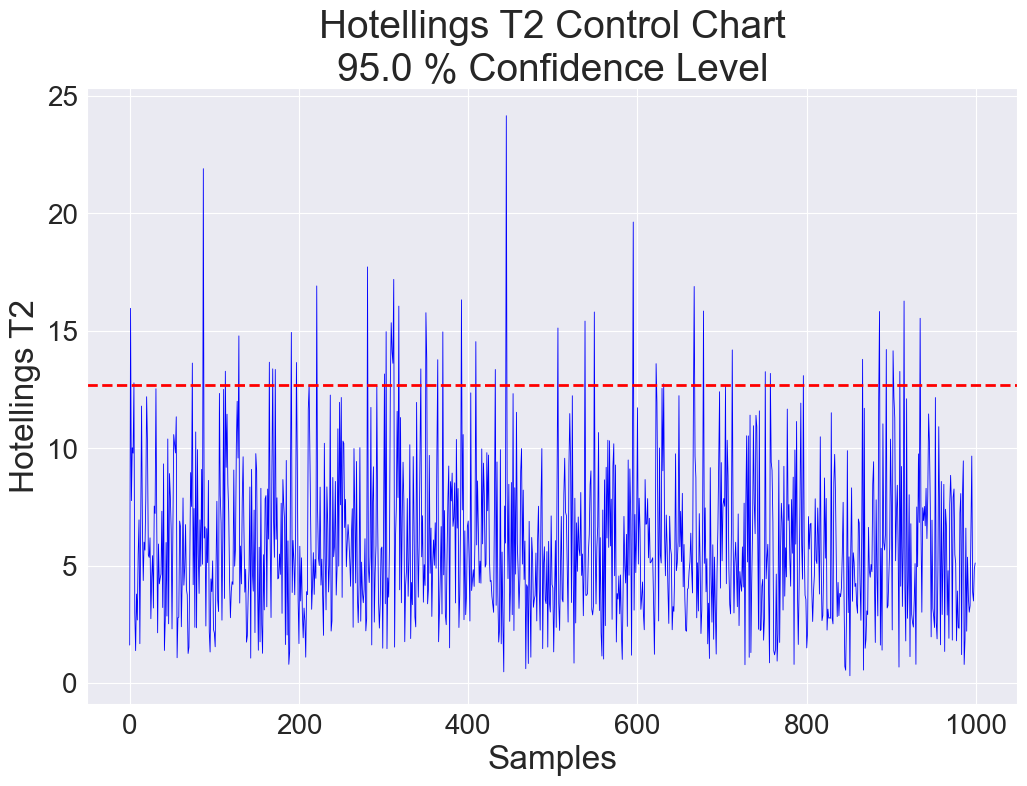

In [12]:
# build control chart - baseline - T2s
fig = adk.build_control_charts(values=t2s, limits=tmax,
                         chart_title='Hotellings T2')
#fig.savefig('../8_imgs/som_studies/hotellings_baseline.pdf',
#            dpi=300, bbox_inches='tight')

In [13]:
# calculate SPE and critical value
spe, spe_max = adk.calculate_SPE(data=data)

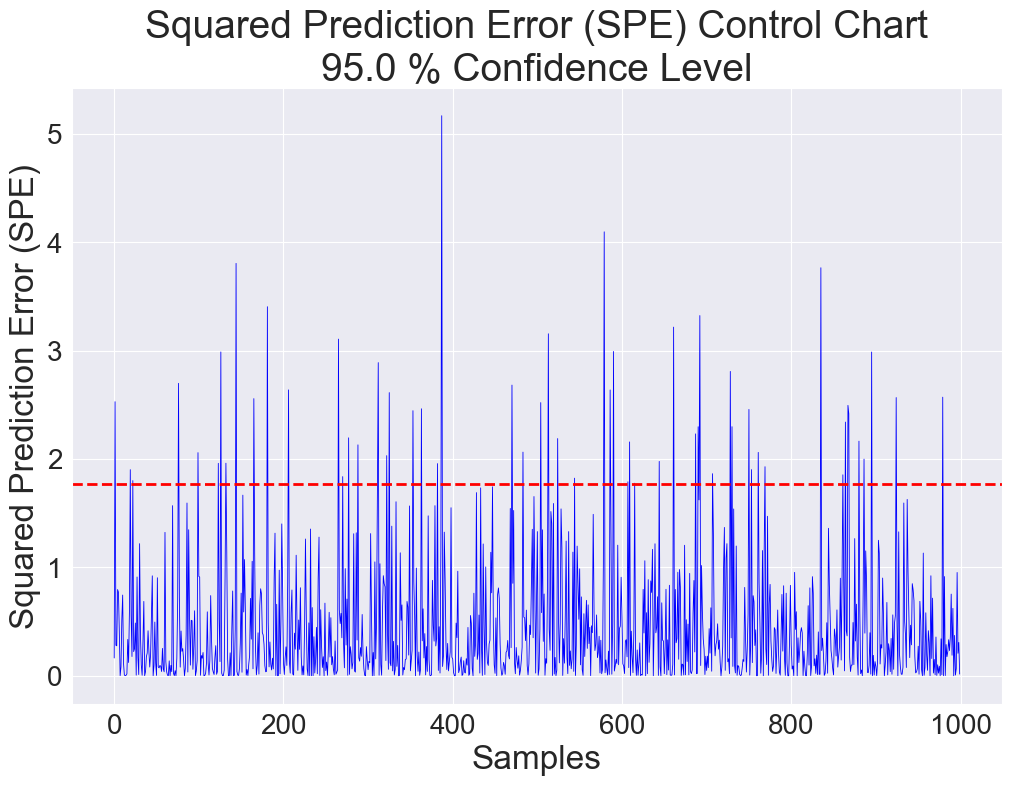

In [14]:
# build control chart - baseline - SPE
fig = adk.build_control_charts(values=spe, limits=spe_max,
                         chart_title='Squared Prediction Error (SPE)')
# fig.savefig('../8_imgs/som_studies/spe_baseline.pdf',
#            dpi=300, bbox_inches='tight')

In [15]:
# join all statistics
data_stats = pd.DataFrame(t2s, columns=['t2'])
data_stats['spe'] = spe
adk.calculate_metrics(data_stats=data_stats, 
                      limits=[tmax, spe_max])

(0.049, 0.057, 0.004)